In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [ ]:
# Display the first few rows of each dataset
print("Deliveries Data Head:")
print(deliveries.head())
print("\nMatches Data Head:")
print(matches.head())

Deliveries Data Head:
   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  e

**Data Cleaning and Preprocessing**

In [ ]:
# Check for missing values
print("\nMissing values in deliveries dataset:")
print(deliveries.isnull().sum())
print("\nMissing values in matches dataset:")
print(matches.isnull().sum())


Missing values in deliveries dataset:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

Missing values in matches dataset:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0


In [ ]:
# Fill missing values with appropriate strategies
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('Not Dismissed')
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('None')
matches['city'] = matches['city'].fillna('Unknown')
matches['winner'] = matches['winner'].fillna('No Result')

In [ ]:
# Convert date column to datetime
matches['date'] = pd.to_datetime(matches['date'], dayfirst=True, errors='coerce')

**Analyze Team Performance**

In [ ]:
# Calculate the number of wins per team
team_wins = matches['winner'].value_counts()
print("\nNumber of Wins per Team:")
print(team_wins)


Number of Wins per Team:
winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
No Result                        4
Name: count, dtype: int64


In [ ]:
# Calculate win percentage for each team
total_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()
win_percentage = (team_wins / total_matches) * 100
print("\nWin Percentage per Team:")
print(win_percentage)


Win Percentage per Team:
Chennai Super Kings            60.975610
Deccan Chargers                38.666667
Delhi Capitals                 62.500000
Delhi Daredevils               41.614907
Gujarat Lions                  43.333333
Kings XI Punjab                46.590909
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          51.685393
Mumbai Indians                 58.288770
No Result                            NaN
Pune Warriors                  26.086957
Rajasthan Royals               51.020408
Rising Pune Supergiant         62.500000
Rising Pune Supergiants        35.714286
Royal Challengers Bangalore    46.666667
Sunrisers Hyderabad            53.703704
Name: count, dtype: float64


**Analyze Player Performance**

In [ ]:
# Top run-scorers
top_run_scorers = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print("\nTop Run Scorers:")
print(top_run_scorers)


Top Run Scorers:
batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64


In [ ]:
# Top wicket-takers
dismissal_types = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
top_wicket_takers = deliveries[deliveries['dismissal_kind'].isin(dismissal_types)].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)
print("\nTop Wicket Takers:")
print(top_wicket_takers)


Top Wicket Takers:
bowler
SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: player_dismissed, dtype: int64


**Factors Contributing to Wins and Losses**

In [ ]:
# Home ground advantage
home_wins = matches[matches['city'] == matches['venue'].str.split(' ').str[0]]['winner'].value_counts()
away_wins = matches[matches['city'] != matches['venue'].str.split(' ').str[0]]['winner'].value_counts()
home_advantage = (home_wins / (home_wins + away_wins)) * 100
print("\nHome Ground Advantage:")
print(home_advantage)


Home Ground Advantage:
winner
Chennai Super Kings            1.000000
Deccan Chargers                     NaN
Delhi Capitals                      NaN
Delhi Daredevils               1.492537
Gujarat Lions                       NaN
Kings XI Punjab                2.439024
Kochi Tuskers Kerala                NaN
Kolkata Knight Riders          1.086957
Mumbai Indians                      NaN
No Result                           NaN
Pune Warriors                       NaN
Rajasthan Royals                    NaN
Rising Pune Supergiant              NaN
Rising Pune Supergiants             NaN
Royal Challengers Bangalore    1.190476
Sunrisers Hyderabad                 NaN
Name: count, dtype: float64


In [ ]:
# Toss impact on match result
toss_match_winner = matches[matches['toss_winner'] == matches['winner']].shape[0]
toss_match_loser = matches[matches['toss_winner'] != matches['winner']].shape[0]
toss_impact = (toss_match_winner / (toss_match_winner + toss_match_loser)) * 100
print("\nToss Impact on Match Result:")
print(toss_impact)


Toss Impact on Match Result:
51.98412698412699


**Visualization**

<ipython-input-17-74c9ffcbde94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")


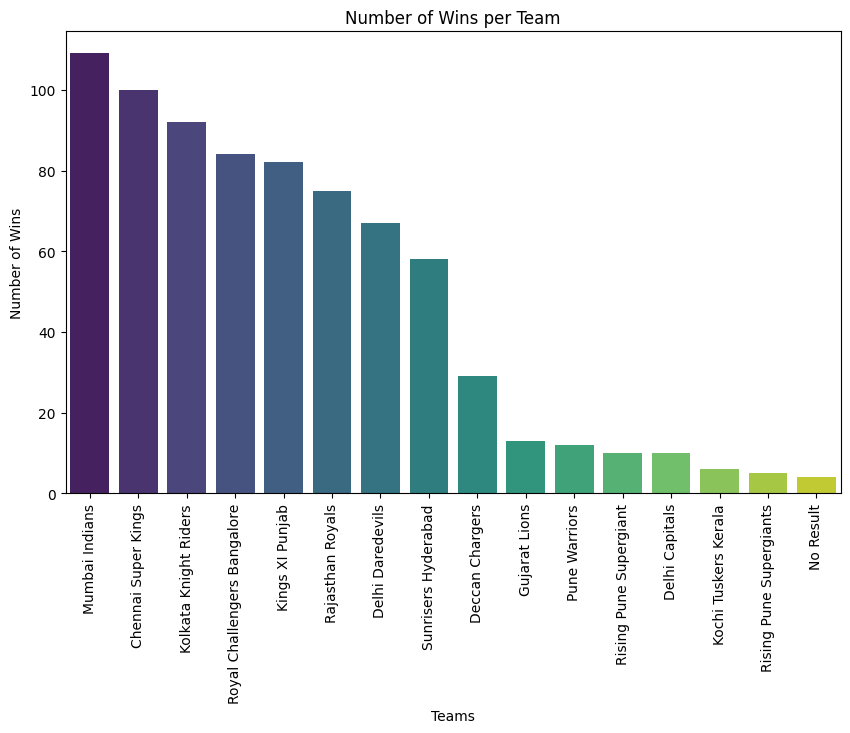

In [ ]:
# Team Performance
plt.figure(figsize=(10, 6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")
plt.title('Number of Wins per Team')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.show()

<ipython-input-19-3d0b251340e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_run_scorers.index, y=top_run_scorers.values, palette="magma")


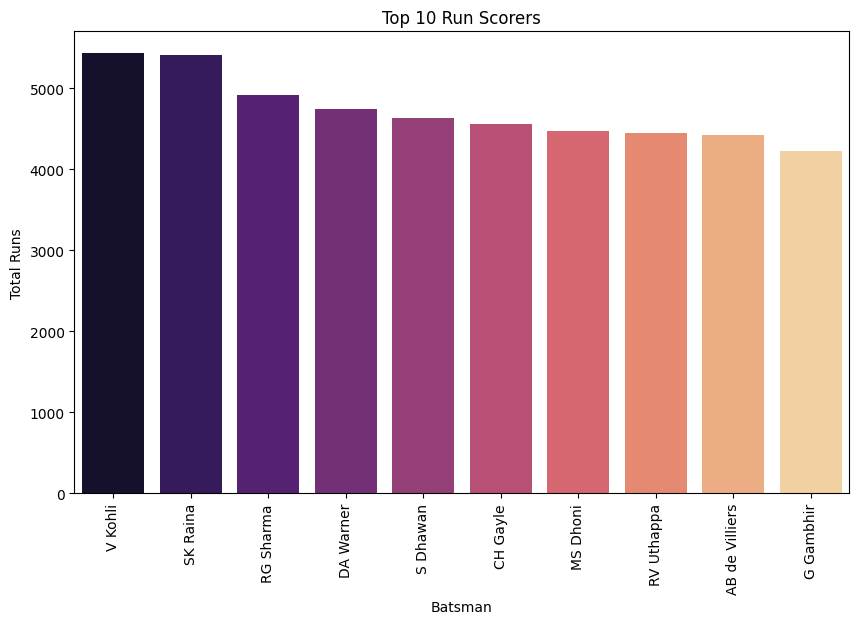

In [ ]:
# Player Performance
plt.figure(figsize=(10, 6))
sns.barplot(x=top_run_scorers.index, y=top_run_scorers.values, palette="magma")
plt.title('Top 10 Run Scorers')
plt.xticks(rotation=90)
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.show()


<ipython-input-20-3f3f7b89ecc6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette="inferno")


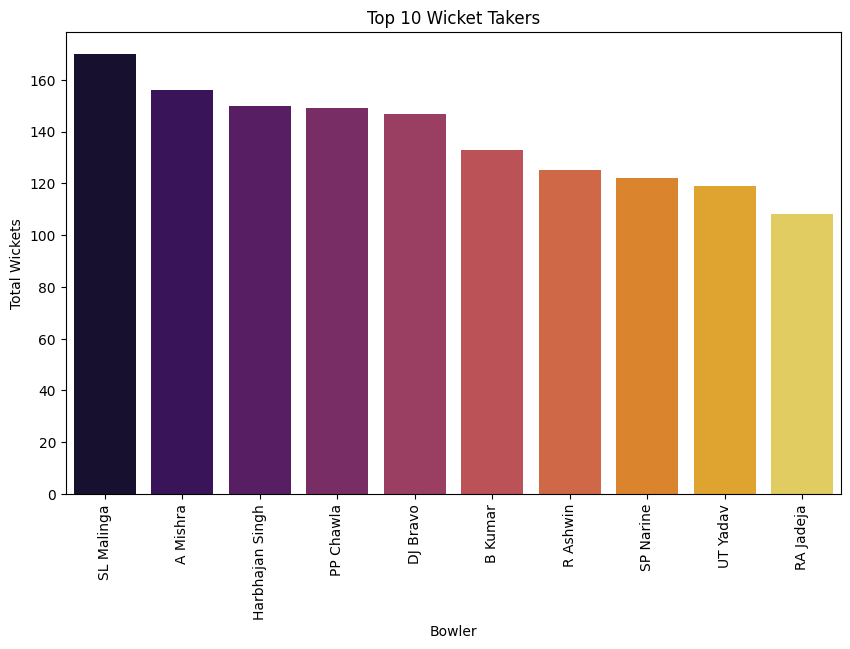

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette="inferno")
plt.title('Top 10 Wicket Takers')
plt.xticks(rotation=90)
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.show()

<ipython-input-21-1602af6d4887>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_advantage.index, y=home_advantage.values, palette="coolwarm")


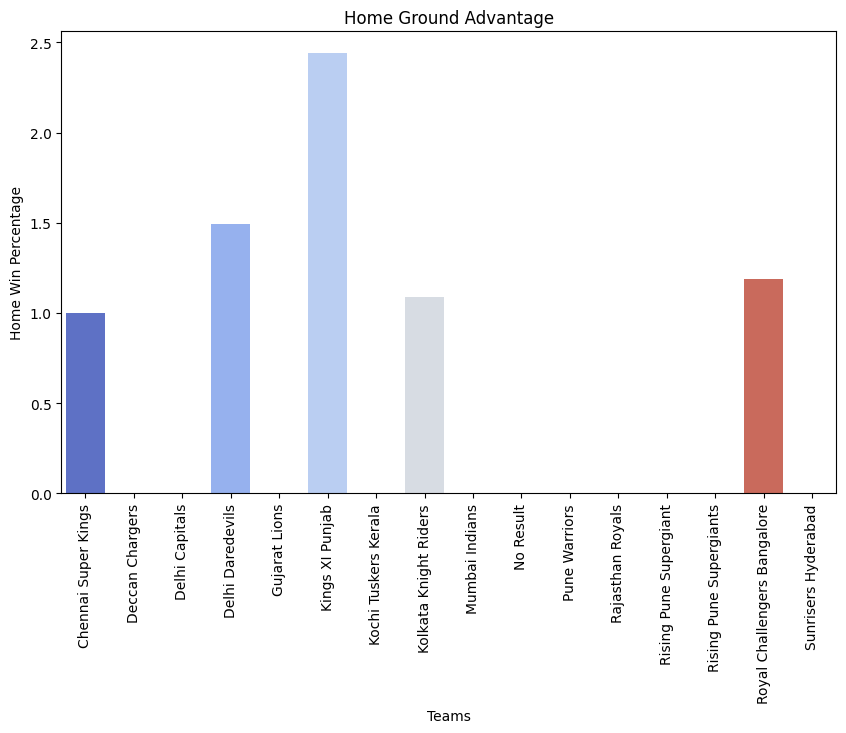

In [ ]:
# Home Ground Advantage
plt.figure(figsize=(10, 6))
sns.barplot(x=home_advantage.index, y=home_advantage.values, palette="coolwarm")
plt.title('Home Ground Advantage')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Home Win Percentage')
plt.show()

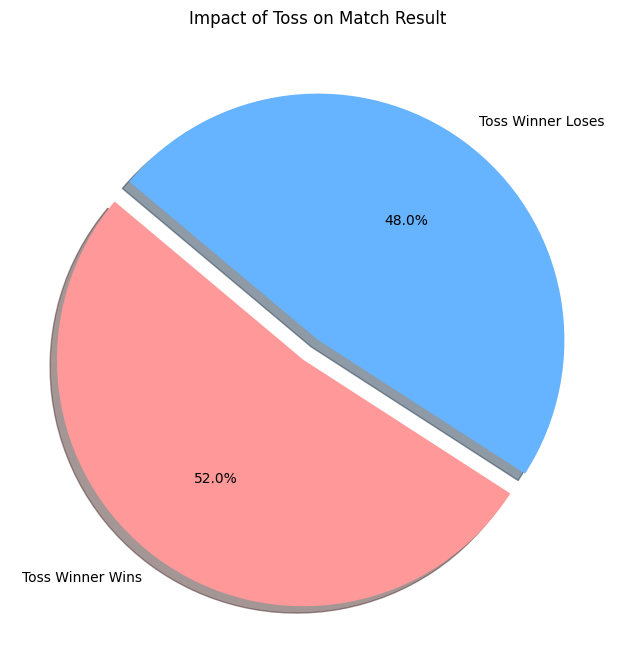

In [ ]:
# Toss Impact on Match Result
labels = ['Toss Winner Wins', 'Toss Winner Loses']
sizes = [toss_match_winner, toss_match_loser]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Impact of Toss on Match Result')
plt.show()